# Indian Kids Screentime Analysis (2025)
This notebook trains a model on the dataset of Indian kids' screentime habits.
**Target:** `Exceeded_Recommended_Limit` (Boolean Classification)
- Dataset source: Kaggle
- Uploaded: `Indian_Kids_Screen_Time.csv`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Mount if on Google Colab and upload CSV manually if needed
df = pd.read_csv('Indian_Kids_Screen_Time.csv')
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


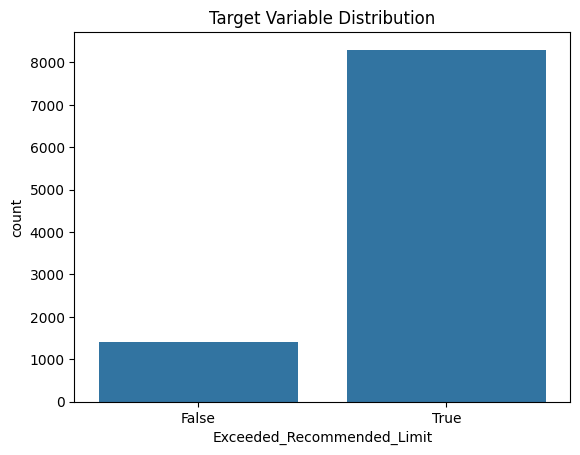

In [4]:
# Dataset info
df.info()

# Check for nulls
df.isnull().sum()

# Target distribution
sns.countplot(data=df, x='Exceeded_Recommended_Limit')
plt.title('Target Variable Distribution')
plt.show()

In [5]:
# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
categorical_cols = ['Gender', 'Primary_Device', 'Health_Impacts', 'Urban_or_Rural']
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Define features and target
X = df_encoded.drop('Exceeded_Recommended_Limit', axis=1)
y = df_encoded['Exceeded_Recommended_Limit']

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       285
        True       1.00      1.00      1.00      1658

    accuracy                           1.00      1943
   macro avg       1.00      1.00      1.00      1943
weighted avg       1.00      1.00      1.00      1943



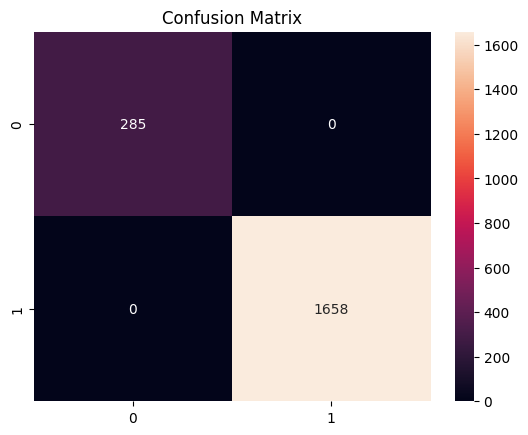

In [8]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

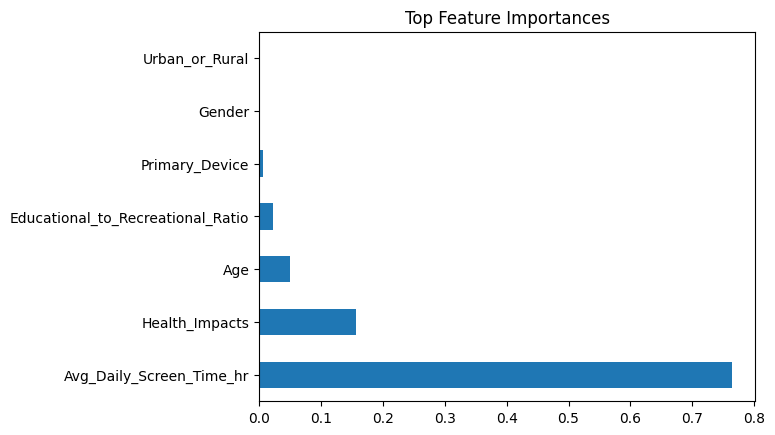

In [9]:
# Feature importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Top Feature Importances')
plt.show()